Text(0.5, 1.0, 'straight line')

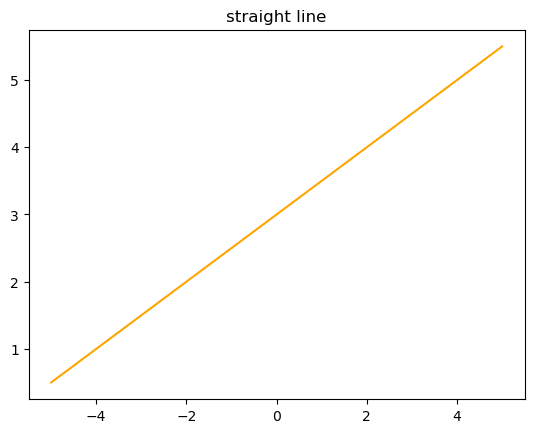

In [4]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-5,5,100)
y=0.5*x+3
plt.plot(x,y,c='orange')
plt.title('straight line')

Text(0.5, 1.0, 'Straight Line')

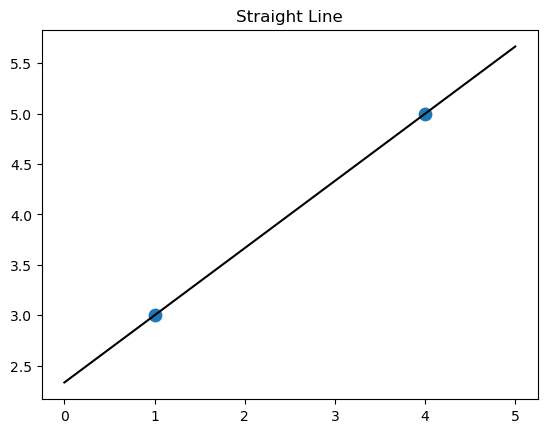

In [5]:
#导入线性回归模型
from sklearn.linear_model import LinearRegression
#输入两个点的横纵坐标(两点确定一条直线)
X=[[1],[4]]
y=[3,5]
#用线性模型拟合这两个点
lr=LinearRegression().fit(X,y)
z=np.linspace(0,5,20)
plt.scatter(X,y,s=80)
plt.plot(z,lr.predict(z.reshape(-1,1)),c='k')
plt.title('Straight Line')

In [6]:
print('\n\n\n直线方程为：')
print('==========\n')
#打印直线方程
print('y = {:.3f}'.format(lr.coef_[0]),'x','+ {:.3f}'.format(lr.intercept_))
print('\n==========')
print('\n\n\n')




直线方程为：

y = 0.667 x + 2.333







Text(0.5, 1.0, 'Straight Line')

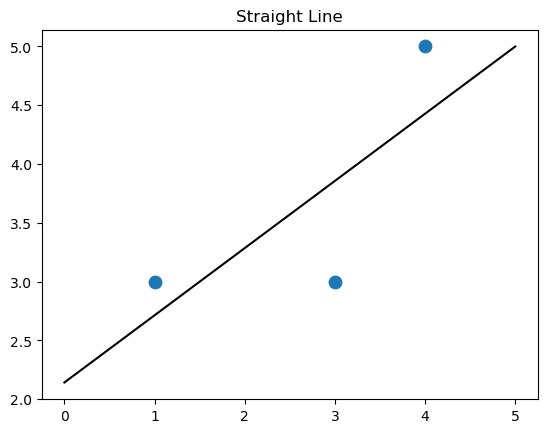

In [7]:
X=[[1],[4],[3]]
y=[3,5,3]
lr=LinearRegression().fit(X,y)
z=np.linspace(0,5,20)
plt.scatter(X,y,s=80)
plt.plot(z,lr.predict(z.reshape(-1,1)),c='k')
plt.title('Straight Line')
#这次直线没有穿过任何一个点，而是位于一个和3个点的距离相加最小的位置。

In [8]:
print('\n\n\n新的直线方程为：')
print('==========\n')
#打印直线方程
print('y = {:.3f}'.format(lr.coef_[0]),'x','+ {:.3f}'.format(lr.intercept_))
print('\n==========')
print('\n\n\n')




新的直线方程为：

y = 0.571 x + 2.143







Text(0.5, 1.0, 'Linear Regression')

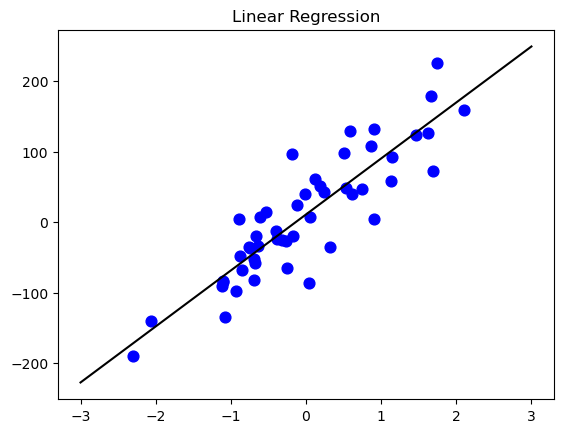

In [13]:
from sklearn.datasets import make_regression
#生成用于分析的数据集
X,y=make_regression(n_samples=50,n_features=1,n_informative=1,
                   noise=50,random_state=1)
#使用线性模型进行拟合
reg=LinearRegression()
reg.fit(X,y)
z=np.linspace(-3,3,200).reshape(-1,1)
plt.scatter(X,y,c='b',s=60)
zpre=reg.predict(z)
plt.plot(z,zpre,c='k')
plt.title('Linear Regression')

In [14]:
print('\n\n\n代码运行结果：')
print('==========\n')
#打印直线的系数和截距
print('直线的系数是：{:.2f}'.format(reg.coef_[0]))
print('直线的截距是：{:.2f}'.format(reg.intercept_))
print('\n==========')
print('\n\n\n')




代码运行结果：

直线的系数是：79.52
直线的截距是：10.92







In [16]:
#导入数据集拆分工具
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X, y = make_regression(n_samples=100,n_features=2,n_informative=2,random_state=38)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
lr = LinearRegression().fit(X_train, y_train)

In [17]:
print('\n\n\n代码运行结果：')
print('==========\n')
print("lr.coef_: {}".format(lr.coef_[:]))
print("lr.intercept_: {}".format(lr.intercept_))
print('\n==========')
print('\n\n\n')




代码运行结果：

lr.coef_: [70.38592453  7.43213621]
lr.intercept_: -1.4210854715202004e-14







intercept_属性一直是一个浮点数，而coef_属性则是一个NumPy数组，其中每个特征对应数据中的一个数值，由于我们这次使用make_regression生成的数据集中数据点有2个特征，所以lr.coef_是一个二维数组。

In [18]:
print('\n\n\n代码运行结果：')
print('==========\n')
print("训练数据集得分：{:.2f}".format(lr.score(X_train, y_train)))
print("测试数据集得分：{:.2f}".format(lr.score(X_test, y_test)))
print('\n==========')
print('\n\n\n')
#这是因为我们这次没有向数据集添加noise，所以分数自然会打到满分了。




代码运行结果：

训练数据集得分：1.00
测试数据集得分：1.00







In [20]:
from sklearn.datasets import load_diabetes
#载入糖尿病情数据集
X, y = load_diabetes().data, load_diabetes().target
#将数据集拆分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
#使用线性回归模型进行拟合
lr = LinearRegression().fit(X_train, y_train)

In [21]:
print('\n\n\n代码运行结果：')
print('==========\n')
print("训练数据集得分：{:.2f}".format(lr.score(X_train, y_train)))
print("测试数据集得分：{:.2f}".format(lr.score(X_test, y_test)))
print('\n==========')
print('\n\n\n')




代码运行结果：

训练数据集得分：0.53
测试数据集得分：0.46







在训练集的得分和测试集的得分之间存在的巨大差异是出现过拟合问题的一个明确信号，因此，我们应该找到一个模型，使我们能够控制模型的复杂度。标准线性回归最常用的替代模型之一是岭回归。
从实用的角度来说，岭回归实际上是一种能够避免过拟合的线性模型。在岭回归中，模型会保留所有的特征变量，但是会减小特征变量的系数值，让特征变量对预测结果的影响变小，在岭回归中是通过改变其alpha参数来控制减小特征变量系数的程度。而这种通过保留全部特征变量，只是降低特征变量的系数值来避免过拟合的方法，我们称之为L2正则化。
岭回归在scikit-learn中是通过linear_model.Ridge函数来调用的。

In [22]:
#导入岭回归
from sklearn.linear_model import Ridge
#使用岭回归对数据进行拟合
ridge=Ridge().fit(X_train,y_train)
print('\n\n\n代码运行结果：')
print('==========\n')
print("岭回归训练数据集得分：{:.2f}".format(ridge.score(X_train, y_train)))
print("岭回归测试数据集得分：{:.2f}".format(ridge.score(X_test, y_test)))
print('\n==========')
print('\n\n\n')




代码运行结果：

岭回归训练数据集得分：0.43
岭回归测试数据集得分：0.43







复杂度越低的模型，在训练数据集上的表现越差，但是其泛化的能力会更好。如果我们更在意模型在泛化方面的表现，那么我们就应该选择岭回归模型，而不是线性回归模型。
岭回归是在模型的简单性（使系数趋近于零）和它在训练集上的性能之间取得平衡的一种模型。用户可以使用alpha参数控制模型更加简单性还是在训练集上的性能更高。在上一个示例中，我们使用默认参数alpha = 1。
注意　alpha的取值并没有一定之规。alpha的最佳设置取决于我们使用的特定数据集。增加alpha值会降低特征变量的系数，使其趋于零，从而降低在训练集的性能，但更有助于泛化。
如果我们的模型出现了过拟合的现象，那么我们可以提高alpha值来降低过拟合的程度。
同时，降低alpha值会让系数的限制变得不那么严格，如果我们用一个非常小的alpha值，那么系统的限制几乎可以忽略不计，得到的结果也会非常接近线性回归。

In [24]:
ridge10=Ridge(alpha=10).fit(X_train,y_train)
print('\n\n\n代码运行结果：')
print('==========\n')
print("岭回归训练数据集得分：{:.2f}".format(ridge10.score(X_train, y_train)))
print("岭回归测试数据集得分：{:.2f}".format(ridge10.score(X_test, y_test)))
print('\n==========')
print('\n\n\n')




代码运行结果：

岭回归训练数据集得分：0.15
岭回归测试数据集得分：0.16







In [25]:
ridge01=Ridge(alpha=0.1).fit(X_train,y_train)
print('\n\n\n代码运行结果：')
print('==========\n')
print("岭回归训练数据集得分：{:.2f}".format(ridge01.score(X_train, y_train)))
print("岭回归测试数据集得分：{:.2f}".format(ridge01.score(X_test, y_test)))
print('\n==========')
print('\n\n\n')




代码运行结果：

岭回归训练数据集得分：0.52
岭回归测试数据集得分：0.47







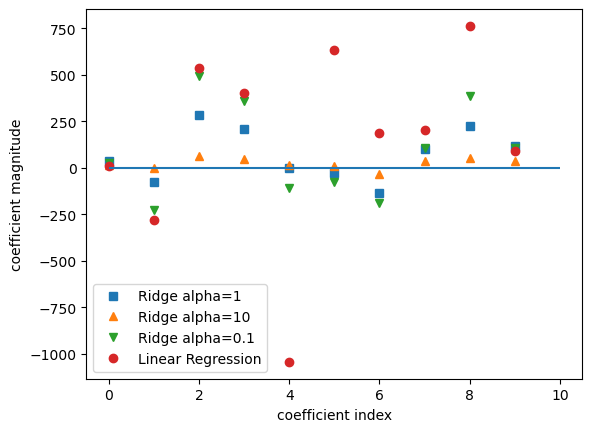

In [29]:
plt.plot(ridge.coef_,'s',label='Ridge alpha=1')
plt.plot(ridge10.coef_,'^',label='Ridge alpha=10')
plt.plot(ridge01.coef_,'v',label='Ridge alpha=0.1')
plt.plot(lr.coef_,'o',label='Linear Regression')
plt.xlabel('coefficient index')
plt.ylabel('coefficient magnitude')
plt.hlines(0,0,len(lr.coef_))
plt.legend()

横轴代表的是coef_属性：x = 0显示第一个特征变量的系数，x = 1显示的是第二个特征变量的系数，依此类推，直到x = 10。纵轴显示特征变量的系数量级。从图中我们不难看出，当alpha = 10时，特征变量系数大多在0附近；而当alpha = 1时，岭模型的特征变量系数普遍增大了。而当alpha = 0.1时，特征变量的系数就更大了，甚至大部分与线性回归的点重合了，而线性回归模型由于没有经过任何正则化处理，其所对应的特征变量系数值就会非常大，其中有一些都快跑到图表之外了。
还有一个能够帮助我们更好理解正则化对模型影响的方法，那就是取一个固定的alpha值，然后改变训练数据集的数据量。

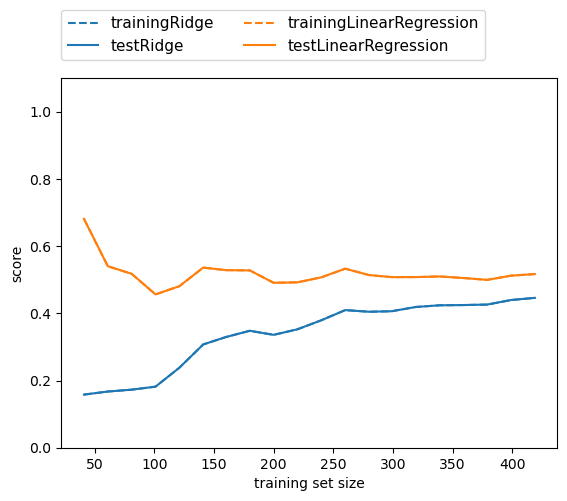

In [38]:
from sklearn.model_selection import learning_curve,KFold
#定义一个绘制学习曲线的函数
def plot_learning_curve(est,X,y):
    #将数据集进行20次拆分用来对模型进行评分
    training_set_size,train_scores,test_scores=learning_curve(
    est,X,y,train_sizes=np.linspace(.1,1,20),cv=KFold(20,shuffle=True,
                                                  random_state=1))
    estimator_name=est.__class__.__name__
    line=plt.plot(training_set_size,train_scores.mean(axis=1),'--',
                 label='training'+estimator_name)
    plt.plot(training_set_size,train_scores.mean(axis=1),'-',
                 label='test'+estimator_name,c=line[0].get_color())
    plt.xlabel('training set size')
    plt.ylabel('score')
    plt.ylim(0,1.1)
plot_learning_curve(Ridge(alpha=1),X,y)
plot_learning_curve(LinearRegression(),X,y)
plt.legend(loc=(0,1.05),ncol=2,fontsize=11)
#这里不知道为啥和书上不一样，也不好看懂

和岭回归一样，套索回归也会将系数限制在非常接近0的范围内，但它进行限制的方式稍微有一点不同，我们称之为L1正则化。与L2正则化不同的是，L1正则化会导致在使用套索回归的时候，有一部分特征的系数会正好等于0。也就是说，有一些特征会彻底被模型忽略掉，这也可以看成是模型对于特征进行自动选择的一种方式。把一部分系数变成0有助于让模型更容易理解，而且可以突出体现模型中最重要的那些特征。

In [39]:
#导入套索回归
from sklearn.linear_model import Lasso
#使用套索回归拟合数据
lasso = Lasso().fit(X_train, y_train)
print('\n\n\n代码运行结果：')
print('==========\n')
print("套索回归在训练数据集的得分：{:.2f}".format(lasso.score(X_train, y_train)))
print("套索回归在测试数据集的得分：{:.2f}".format(lasso.score(X_test, y_test)))
print("套索回归使用的特征数：{}".format(np.sum(lasso.coef_ != 0)))




代码运行结果：

套索回归在训练数据集的得分：0.36
套索回归在测试数据集的得分：0.37
套索回归使用的特征数：3


这里我们看到，套索回归在训练数据集和测试数据集的得分都相当糟糕。这意味着我们的模型发生了欠拟合的问题，而且你会发现，在10个特征里面，套索回归只用了3个。与岭回归类似，套索回归也有一个正则化参数alpha，用来控制特征变量系数被约束到0的强度。
在上面的例子里，我们用了alpha的默认值1.0。为了降低欠拟合的程度，我们可以试着降低alpha的值。与此同时，我们还需要增加最大迭代次数（max_iter）的默认设置。

In [42]:
#增大最大迭代次数的默认设置，否则模型会提醒
lasso01=Lasso(alpha=0.1,max_iter=100000).fit(X_train,y_train)
print('\n\n\n代码运行结果：')
print('==========\n')
print("alpha=0.1套索回归在训练数据集的得分：{:.2f}".format(lasso01.score(X_train, y_train)))
print("alpha=0.1套索回归在测试数据集的得分：{:.2f}".format(lasso01.score(X_test, y_test)))
print("alpha=0.1套索回归使用的特征数：{}".format(np.sum(lasso01.coef_ != 0)))




代码运行结果：

alpha=0.1套索回归在训练数据集的得分：0.52
alpha=0.1套索回归在测试数据集的得分：0.48
alpha=0.1套索回归使用的特征数：7


从结果来看，降低alpha值可以拟合出更复杂的模型，从而在训练数据集和测试数据集都能获得良好的表现。相对岭回归，套索回归的表现还要稍好一点，而且它只用了10个特征中的7个，这一点也会使模型更容易被人理解。
但是，如果我们把alpha值设置得太低，就等于把正则化的效果去除了，那么模型就可能会像线性回归一样，出现过拟合的问题。

In [43]:
lasso00001=Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)
print('\n\n\n代码运行结果：')
print('==========\n')
print("alpha=0.0001套索回归在训练数据集的得分：{:.2f}".format(lasso00001.score(X_train, y_train)))
print("alpha=0.0001套索回归在测试数据集的得分：{:.2f}".format(lasso00001.score(X_test, y_test)))
print("alpha=0.0001套索回归使用的特征数：{}".format(np.sum(lasso00001.coef_ != 0)))




代码运行结果：

alpha=0.0001套索回归在训练数据集的得分：0.53
alpha=0.0001套索回归在测试数据集的得分：0.46
alpha=0.0001套索回归使用的特征数：10


Text(0, 0.5, 'coefficient magnitude')

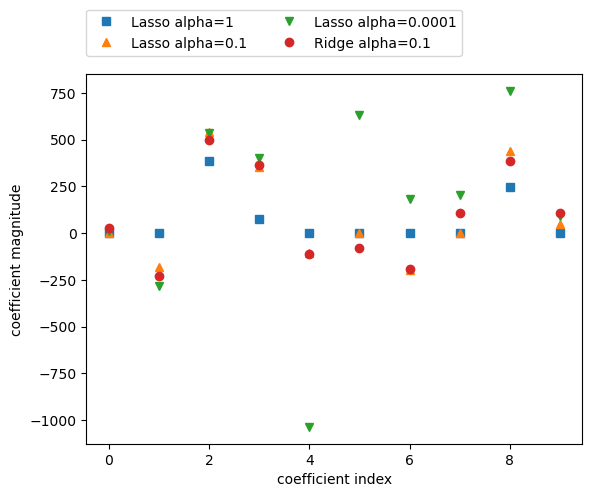

In [47]:
plt.plot(lasso.coef_,'s',label='Lasso alpha=1')
plt.plot(lasso01.coef_,'^',label='Lasso alpha=0.1')
plt.plot(lasso00001.coef_,'v',label='Lasso alpha=0.0001')
plt.plot(ridge01.coef_,'o',label='Ridge alpha=0.1')
plt.legend(ncol=2,loc=(0,1.05))
#plt.ylim(-25,25)
plt.xlabel('coefficient index')
plt.ylabel('coefficient magnitude')

在实践当中，岭回归往往是这两个模型中的优选。但是如果你的数据特征过多，而且其中只有一小部分是真正重要的，那么套索回归就是更好的选择。同样如果你需要对模型进行解释的话，那么套索回归会让你的模型更容易被人理解，因为它只是使用了输入的特征值中的一部分。
当然在实际应用中，我们常常要先决定是使用L1正则化的模型还是L2正则化的模型。大体的原则是这样，如果你的数据集有很多特征，而这些特征中并不是每一个都对结果有重要的影响，那么就应该使用L1正则化的模型，如套索回归；但如果数据集中的特征本来就不多，而且每一个都有重要作用的话，那么就应该使用L2正则化的模型，如岭回归。
虽然线性模型是一个存在历史相当悠久的算法模型，但目前它们的应用依然非常普遍，这主要是因为线性模型的训练速度非常快，尤其是对于那些超大型数据集来讲。而且其过程非常容易被人理解——基本上学过初中数学的人都能明白线性模型的原理。但是它也有一定的局限性，当数据集的特征比较少的时候，线性模型的表现就会相对偏弱一些。